# COMP4432 Competition - Don't Overfit II
reference: https://www.kaggle.com/code/artgor/how-to-not-overfit

In [1]:
#  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.manifold import TSNE


In [2]:
submission=pd.read_csv('./sample_submission.csv')
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

train.shape, test.shape, submission.shape

((250, 302), (19750, 301), (19750, 2))

In [ ]:
y=train['target']
X=train.drop(["id", "target"], axis=1)

train=X

test = test.drop(["id"], axis=1)

#### Data Cleaning & Preparation

In [38]:
display(train.head())

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [6]:
display(test.head())

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [ ]:
train.isnull().any().any()

0

In [39]:
train.duplicated().sum()

0

In [9]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


In [10]:
train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

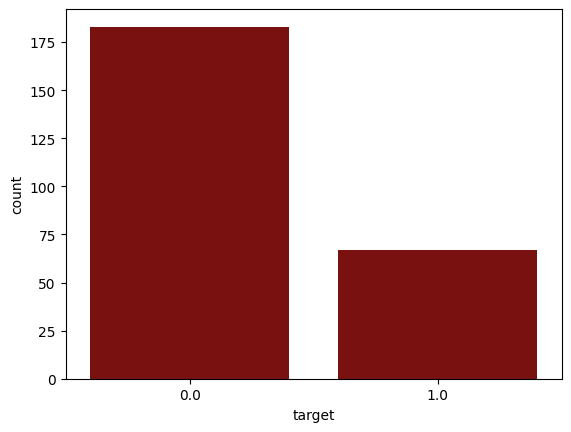

In [11]:
p = sns.countplot(data=train, x="target", color="darkred")
plt.show()

Text(0, 0.5, 'Frequency')

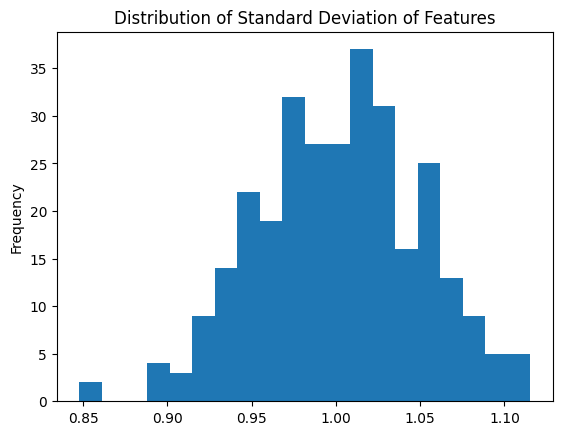

In [35]:
std_values = train[train.columns[2:]].std()
plt.hist(std_values, bins=20)
plt.title('Distribution of Standard Deviation of Features')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

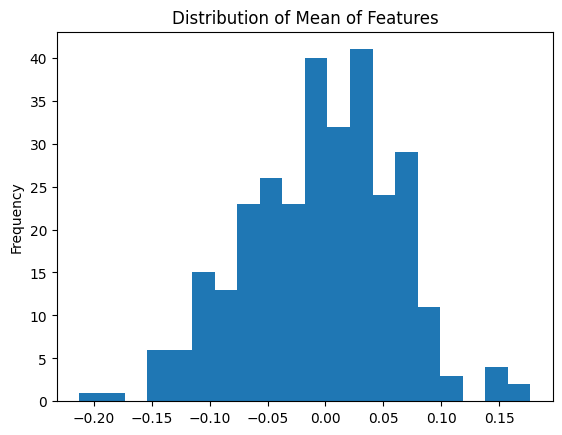

In [36]:
mean_values = train[train.columns[2:]].mean()
plt.hist(mean_values, bins=20)
plt.title('Distribution of Mean of Features')
plt.ylabel('Frequency')

Distributions of first 28 columns


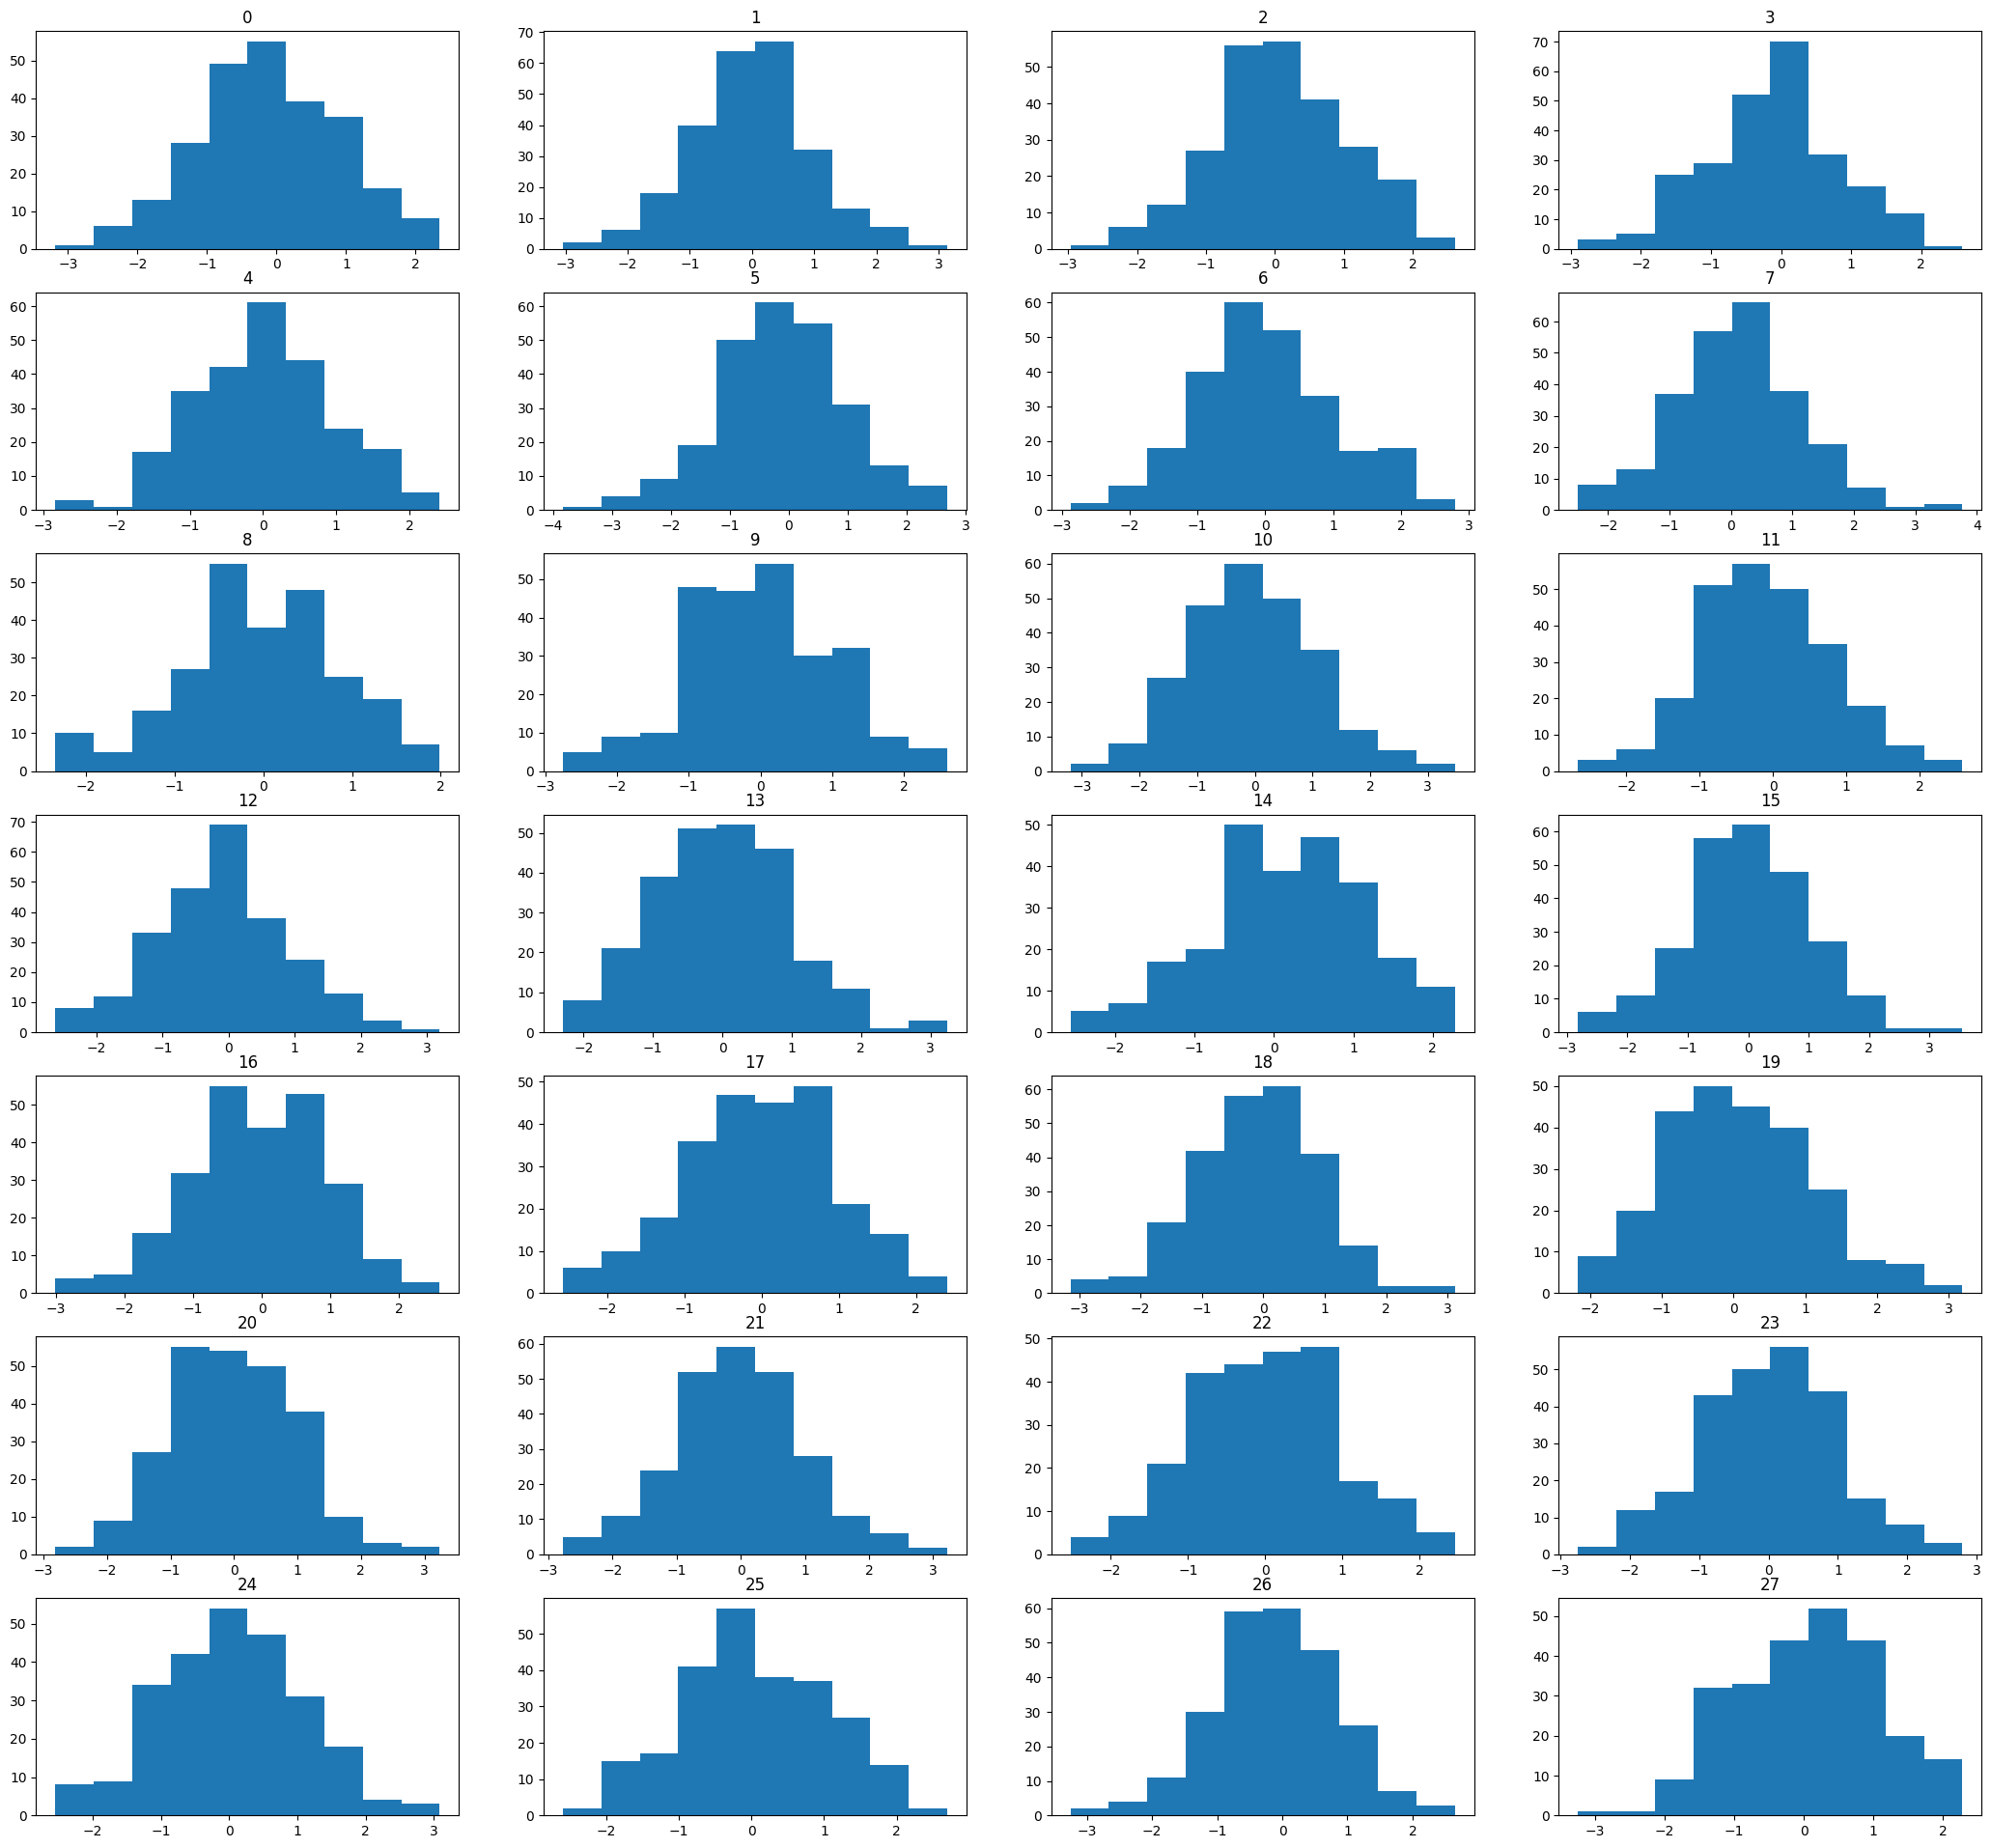

In [37]:
print('Distributions of first 28 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)

## 1. Exploratory Data Analysis

### 1.1 Statistical Analysis

### t-SNE

<Figure size 1200x800 with 0 Axes>

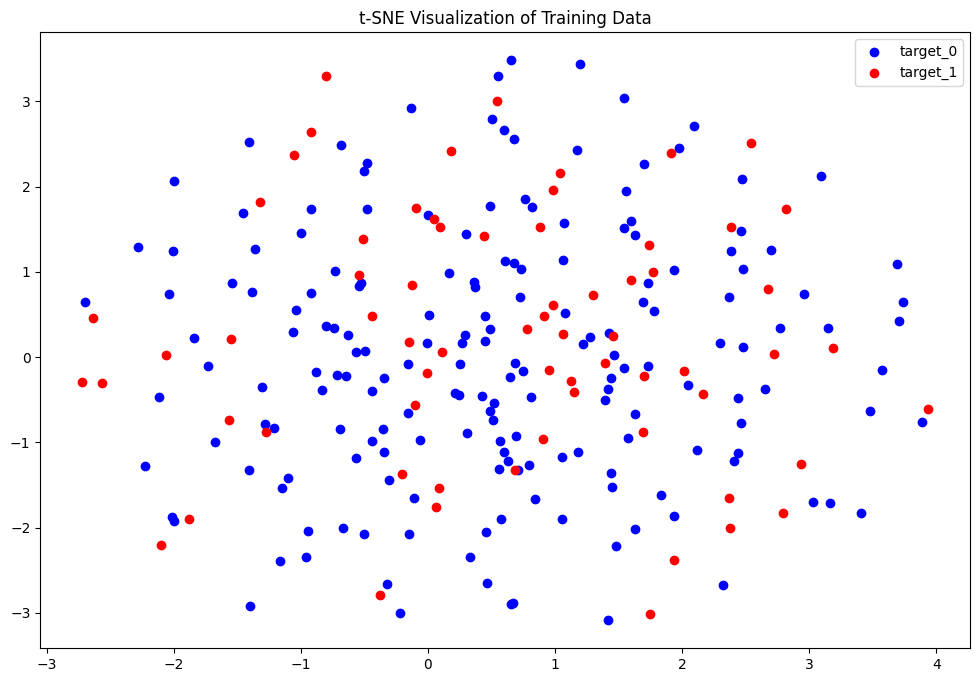

In [26]:
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 8))

colors=['blue','red']
labels=['target_0', 'target_1']


if len(y) != train_tsne.shape[0]:
    # raise ValueError("Length of y does not match the number of samples in X.")
    y = y[:X.shape[0]]

plt.figure(figsize=(12, 8))

for i in range(2):
    indices = (y == i)
    plt.scatter(train_tsne[indices, 0], train_tsne[indices, 1], c=colors[i], label=labels[i])


plt.title('t-SNE Visualization of Training Data')
plt.legend()
plt.show()

In [ ]:
test_tsne = tsne.fit_transform(test)

plt.figure(figsize=(12, 8))
plt.scatter(test_tsne[:,0])

### 1.2 Correlation - feature analysis

In [ ]:
import matplotlib.pyplot as plt

In [46]:
train_temp = train.drop(['id'], axis=1)
train_temp.corr()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
target,1.000000,-0.085268,-0.111172,-0.036050,0.153317,0.077830,0.006206,0.090943,-0.003443,0.020330,...,-0.003138,-0.105296,0.010295,-0.016191,0.035138,-0.071524,-0.020375,-0.065313,-0.012973,0.050805
0,-0.085268,1.000000,0.039939,0.069846,-0.139829,0.079360,-0.063259,-0.071990,0.016923,0.043081,...,-0.022926,-0.052895,-0.020901,-0.012124,-0.007601,0.041362,0.009961,-0.002739,0.092893,0.065807
1,-0.111172,0.039939,1.000000,0.023237,-0.096873,-0.052313,0.048742,-0.086880,-0.013418,-0.005268,...,0.002967,0.013950,0.002014,-0.013278,0.090214,-0.060408,-0.192962,0.025713,-0.049503,0.010546
2,-0.036050,0.069846,0.023237,1.000000,-0.107534,0.077051,-0.044687,-0.086411,0.000560,0.028217,...,0.051288,-0.041872,-0.101789,0.000431,0.078297,0.151670,-0.030104,-0.025195,-0.086761,-0.169051
3,0.153317,-0.139829,-0.096873,-0.107534,1.000000,-0.068026,-0.009757,0.049916,-0.063416,0.069039,...,-0.050296,-0.002434,-0.044130,-0.049341,-0.010336,0.019118,-0.049607,-0.008971,-0.052998,0.076426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.071524,0.041362,-0.060408,0.151670,0.019118,-0.014687,0.070082,-0.069957,0.048203,0.113801,...,0.032321,0.080775,0.012047,-0.047029,-0.056763,1.000000,-0.045375,-0.036558,-0.013592,-0.022727
296,-0.020375,0.009961,-0.192962,-0.030104,-0.049607,-0.002116,0.016213,-0.004527,-0.087313,-0.042409,...,0.065599,0.064637,-0.008712,0.062668,-0.001654,-0.045375,1.000000,-0.040571,0.101211,-0.060556
297,-0.065313,-0.002739,0.025713,-0.025195,-0.008971,-0.031669,0.074662,0.007120,-0.047059,0.013366,...,-0.014895,-0.014151,-0.071989,0.076124,0.092265,-0.036558,-0.040571,1.000000,-0.000301,-0.112310
298,-0.012973,0.092893,-0.049503,-0.086761,-0.052998,-0.044680,0.032147,-0.020821,-0.061363,0.019664,...,0.094907,0.012625,-0.005793,-0.043315,0.042214,-0.013592,0.101211,-0.000301,1.000000,0.072470


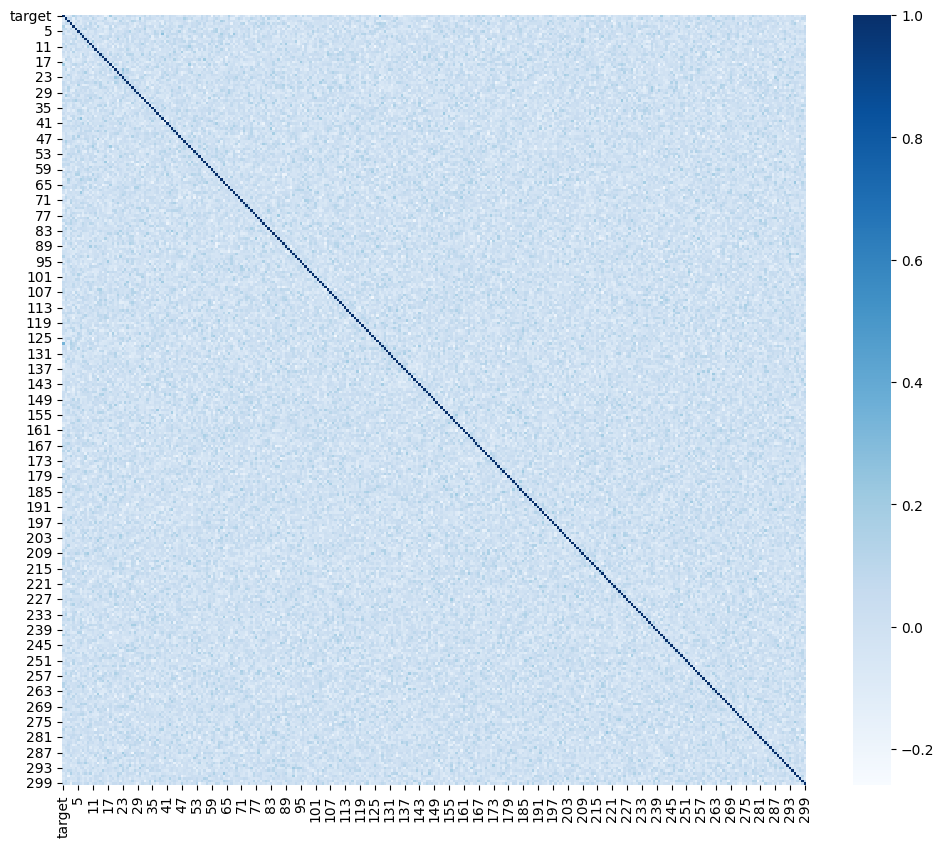

In [55]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_temp.corr(), ax=ax,  cmap='Blues')
plt.show()

In [56]:
# extract important feature from correlation
corr_matrix = train_temp.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_15_features = target_corr.head(16).index
top_corr_matrix = train_temp[top_15_features].corr()
top_corr_matrix

,target,127,176,18,59,135,16,241,126,69,74,3,133,113,199,136
target,1.000000,0.337540,-0.217100,0.206452,-0.203166,-0.179960,-0.179796,0.173879,-0.167064,-0.164571,-0.157756,0.153317,-0.147518,-0.146098,-0.145666,-0.140761
127,0.337540,1.000000,-0.080494,0.028445,-0.107301,-0.065822,-0.049682,0.102135,-0.028353,-0.053132,0.002009,0.090273,-0.062245,-0.042114,-0.010638,-0.025039
176,-0.217100,-0.080494,1.000000,0.002698,0.026009,0.013927,0.020055,0.141216,0.031976,0.056577,-0.017664,0.012105,0.043756,0.045784,0.087463,-0.024703
18,0.206452,0.028445,0.002698,1.000000,-0.049571,0.003507,0.013268,0.005993,-0.023582,-0.085804,-0.057930,0.083178,-0.055273,0.011218,-0.027503,0.039034
59,-0.203166,-0.107301,0.026009,-0.049571,1.000000,0.055680,0.092706,-0.021667,0.104020,0.042972,-0.030141,0.016130,0.013667,-0.154079,0.046504,-0.041279
135,-0.179960,-0.065822,0.013927,0.003507,0.055680,1.000000,0.066729,0.092191,0.099418,0.044066,-0.016272,-0.036084,0.002281,-0.076623,0.090825,0.039299
16,-0.179796,-0.049682,0.020055,0.013268,0.092706,0.066729,1.000000,-0.058023,-0.066579,0.000601,-0.013325,-0.130855,-0.050782,-0.008630,0.067453,-0.025554
241,0.173879,0.102135,0.141216,0.005993,-0.021667,0.092191,-0.058023,1.000000,-0.088203,-0.141732,-0.006121,0.000761,-0.000281,-0.015173,0.000865,-0.032097
126,-0.167064,-0.028353,0.031976,-0.023582,0.104020,0.099418,-0.066579,-0.088203,1.000000,-0.048113,0.077258,-0.048489,-0.034224,-0.004660,-0.019567,0.055329
69,-0.164571,-0.053132,0.056577,-0.085804,0.042972,0.044066,0.000601,-0.141732,-0.048113,1.000000,-0.031846,-0.002631,0.029717,-0.090034,0.138755,0.030303


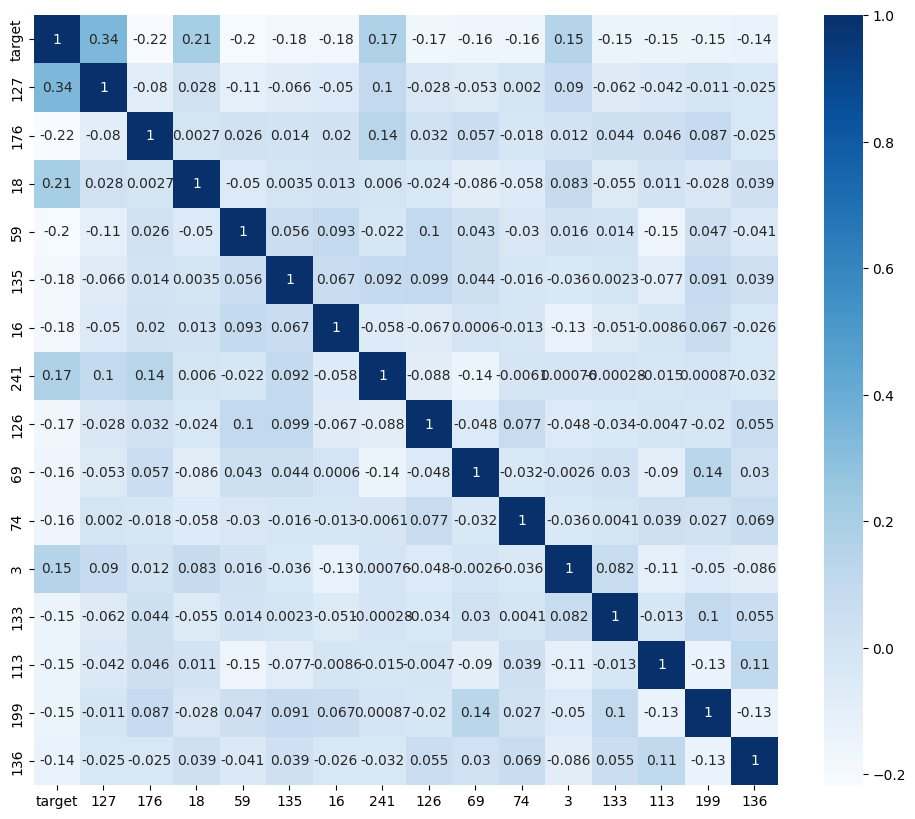

In [57]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

In [13]:
x = (df.target.value_counts())
print(x)

0.0    183
1.0     67
Name: target, dtype: int64


In [ ]:
y = df['target'] # only target
X = df.drop(columns=['id','target'], axis=1) # withdraw id, target column
test = test.drop(["id"], axis=1)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Feature Engineering

### Data Cleaning & Preparation Part
code from start

### Normalization data

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(X)

x_train_scaler = scaler.fit_transform(train)
x_test_scaler = scaler.transform(test)

## 3. Model Training

In [ ]:
# K-Folds cross-validator
# reference: https://scikit-learn.org/stable/modules/cross_validation.html


## Decision Tree Classifier

## Random Forest